In [114]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

df = fetch_california_housing()

In [115]:
#Separating data.
df_x, df_y = fetch_california_housing(return_X_y=True) #data, target

In [116]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [117]:
index = np.arange(df_y.shape[0])
np.random.shuffle(index)

df_X, df_Y = df_x[index], df_y[index]

In [118]:
df_X

array([[   7.6877    ,   21.        ,    8.27973749, ...,    2.99015587,
          37.91      , -122.01      ],
       [   4.25      ,   24.        ,    5.43989983, ...,    2.87228715,
          33.68      , -117.96      ],
       [   1.7938    ,   41.        ,    3.99621928, ...,    4.45557656,
          33.79      , -118.19      ],
       ...,
       [   3.0645    ,   32.        ,    4.30725462, ...,    2.89758179,
          37.67      , -122.11      ],
       [   3.3594    ,   30.        ,    3.97297297, ...,    2.57057057,
          34.18      , -118.42      ],
       [   4.4615    ,   20.        ,    4.35700576, ...,    2.0537428 ,
          33.83      , -118.38      ]])

In [119]:
df_x[index]

array([[   7.6877    ,   21.        ,    8.27973749, ...,    2.99015587,
          37.91      , -122.01      ],
       [   4.25      ,   24.        ,    5.43989983, ...,    2.87228715,
          33.68      , -117.96      ],
       [   1.7938    ,   41.        ,    3.99621928, ...,    4.45557656,
          33.79      , -118.19      ],
       ...,
       [   3.0645    ,   32.        ,    4.30725462, ...,    2.89758179,
          37.67      , -122.11      ],
       [   3.3594    ,   30.        ,    3.97297297, ...,    2.57057057,
          34.18      , -118.42      ],
       [   4.4615    ,   20.        ,    4.35700576, ...,    2.0537428 ,
          33.83      , -118.38      ]])

In [120]:
train_scores, valid_scores = validation_curve(Ridge(), df_X, df_Y, param_name="alpha", param_range=np.logspace(-7, 3, 3),cv=5)

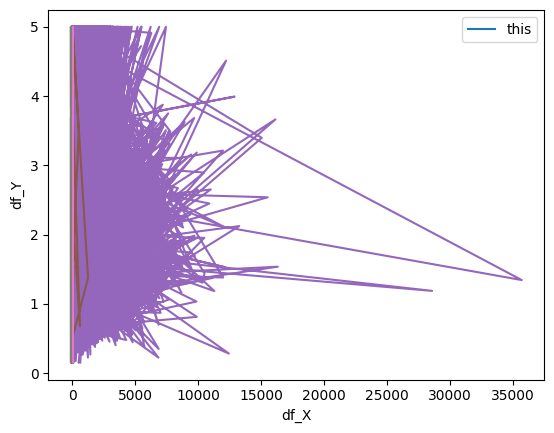

In [121]:
fig, ax = plt.subplots()

plt.plot(df_X, df_Y)

plt.xlabel("df_X")
plt.ylabel("df_Y")

plt.legend(["this"])

plt.show()

In [122]:
#Cross validation

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold

regr = linear_model.LinearRegression() #Regresion lineal

kf = KFold(n_splits=5, shuffle=True, random_state=2) #mas nsplits mas se dividen los datos

#for x_values, y_values in kf.split(df_x):
    #print(x_values,y_values)

x_maincv,x_testcv,y_maincv,y_testcv = train_test_split(df_x,df_y,test_size=0.2,random_state=0) 
regr.fit(x_maincv,y_maincv)
y_predcv = regr.predict(x_testcv)
print(y_predcv)

[2.28110738 2.79009128 1.90332794 ... 0.8418697  2.7984953  2.21779325]


In [123]:
#Train, test, validation
x_main,x_test,y_main,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=0) 

x_train,x_val,y_train,y_val = train_test_split(x_main,y_main,test_size=0.2,random_state=0)


#Import the Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor   

#Create a Random Forest regressor object from Random Forest Regressor class
RFReg = RandomForestRegressor(n_estimators = 250, random_state = 0) 
RFReg.fit(x_val, y_val)

#Predicted Height from test dataset w.r.t Random Forest Regression
y_predict_rfr = RFReg.predict((x_val))
print(y_predict_rfr)

[2.49315208 1.68091216 1.80403204 ... 1.117968   2.65165604 2.08342   ]
